# Chapter 2

This Jupyter notebook contains discussions and solutions for exercises for chapter 2.

In [1]:
from chap02 import *

### Problem 1
Use the rate given by equation 2.1 with $r_0=50 Hz$ and 

$$D(\tau)=−\cos\left(\frac{2\pi(\tau−20 ms)}{140 ms}\right)\exp(−\frac{\tau}{60 ms})Hz/ms$$

to predict the response of a neuron of the electrosensory lateral-line
lobe to a stimulus.  The above equation is an approximation for
the linear kernel obtained from the spike-triggered average shown
in figure 1.9. Use an approximate Gaussian white noise stimulus
constructed by choosing a stimulus value every 10 ms ($\Delta t=10$ ms)
from a Gaussian distribution with zero mean and variance $\frac{\sigma^2_s}{\Delta t}$,
with $\sigma^2_s=10$. Compute the firing rate over a 10 s period. From the
results, compute the firing rate-stimulus correlation function $Q_{rs}(\tau)$.
Using equation 2.6, compare $\frac{Q_{rs}(−\tau)}{\sigma^2_s}$ with the kernel $D(\tau)$ givenabove.

*****
Since the kernel has exponential decay, we assume (to speed up calculations) that its value for $\tau > 600$ ms is negligible, therefore, we integrate over the interval $\tau \in [0,600] ms$.

There is a little problem with value of $\sigma_s$ since in the problem we are given value 10 without units, although $[\sigma_s]=[stimulus]*[time]^{\frac12}$. We therefore supposed the units are $[stimulus] = 1$ and $[time] = ms$, because for units $[time] = s$ the resulting firing rate had standard deviation around 470 and for approximately 50% of time it was negative, which we assume is wrong.


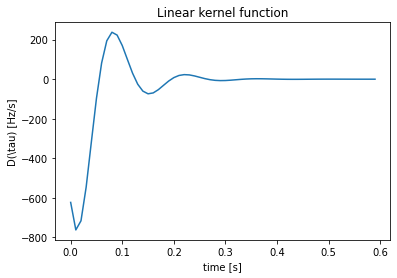

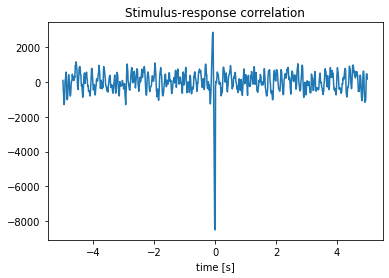

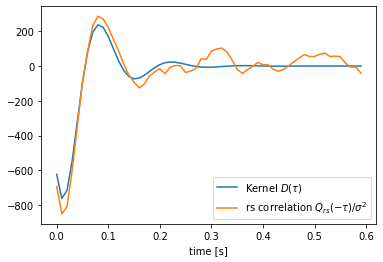

In [3]:
exercise1()

### Problem 2
MATLAB® file c1p8.mat contains the data described in exercise 8 ofchapter 1. Use the spike-triggered average (calculated in that exercise) to construct a linear kernel and use it in equation 2.1 to provide a model of the response of the H1 neuron. Choose $r_0$ so that the average firing rate predicted by the model in response to the stimulus used for the data matches the actual average firing rate. Use a Poisson generator with the computed rate to generate a synthetic spike train from this linear estimate of the firing rate in response to the stimulus `stim`. Plot examples of the actual and synthetic spike trains. How are they similar and how do they differ? Plot the autocorrelation function of the actual and the synthetic spike trains over the range 0 to 100 ms. Why is there a dip at a lag of 2 ms in the autocorrelation of the actual spike train? Is there a dip for the synthetic train too? Plot the interspike interval histogram for both spike trains. Why is there a dip below 6 ms in the histogram for the actual spike train? What are the coefficients of variation for the two spike trains and why might they differ? (Based on a problem from Sebastian Seung).

*****

This problem is not finished, since the result is weird - we are getting firing rate < 0 for 40% of times!

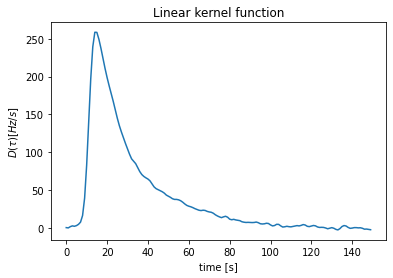

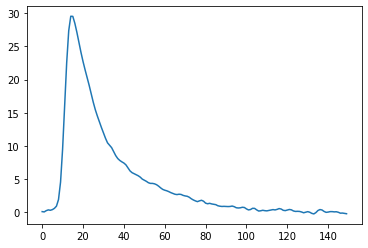

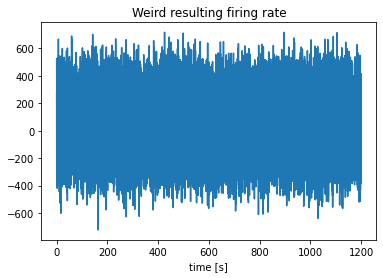

In [2]:
exercise2()

### Problem 3

MATLAB® file c2p3.mat contains the responses of a cat LGN cell to
two-dimensional visual images (these data are described in Kara, P,
Reinagel, P, & Reid, RC (2000) Low response variability in 
simultaneously recorded retinal, thalamic, and cortical neurons. *Neuron*
30:803-817 and were kindly provided by Clay Reid). In the file,
counts is a vector containing the number of spikes in each 15.6 ms
bin, and stim contains the 32767, 16 × 16 images that were presented
at the corresponding times. Specifically, `stim(x, y, t)` is the stimulus presented at the coordinate (x,y) at time-step t. Note that
stim is an int8 array that must to be converted into double using
the command stim=double(stim) in order to be manipulated within
MATLAB ® . Calculate the spike-triggered average images for each of
the 12 time steps before each spike and show them all (using the
imagesc command). Note that in this example, the time bins can
contain more than one spike, so the spike-triggered average must be
computed by weighting each stimulus by the number of spikes in
the corresponding time bin, rather than weighting it by either 1 or
0 depending on whether a spike is present or not. In the averaged
images, you should see a central receptive field that reverses sign
over time. By summing up the images across one spatial dimension,
produce a figure like that of figure 2.25C. (Based on a problem from
Sebastian Seung.)

*****
Last plot does not work in this Notebook, it is supposed to be animation

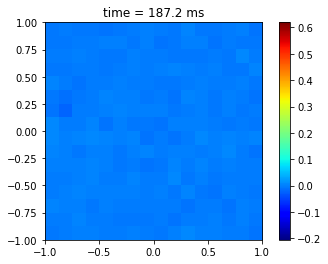

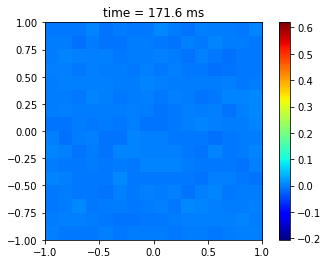

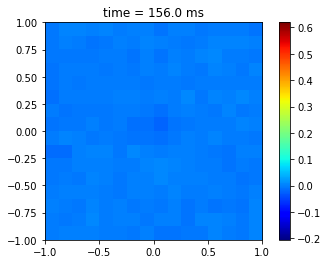

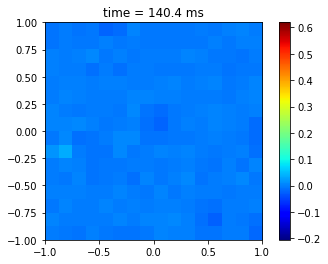

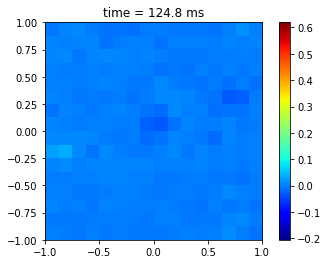

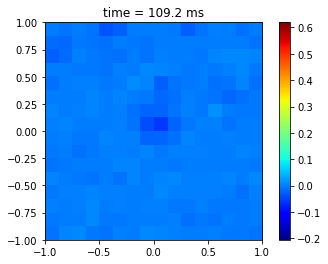

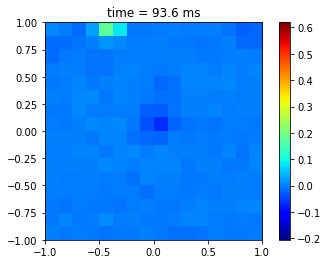

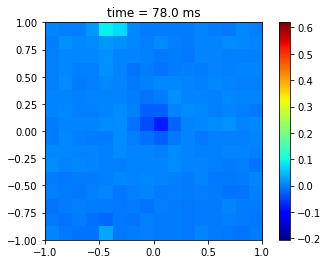

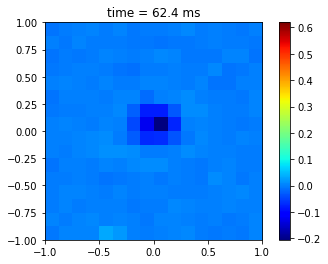

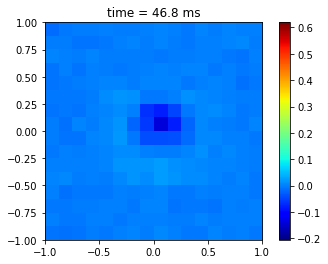

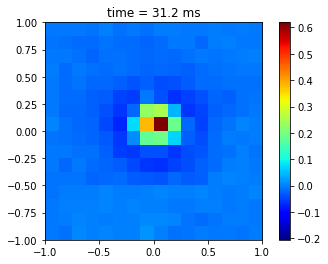

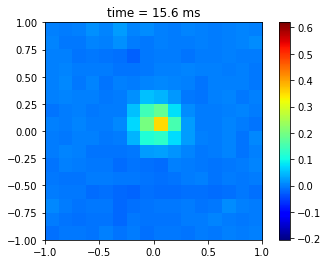

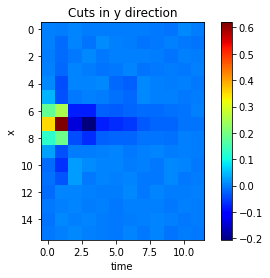

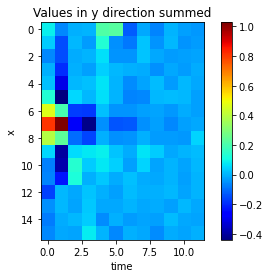

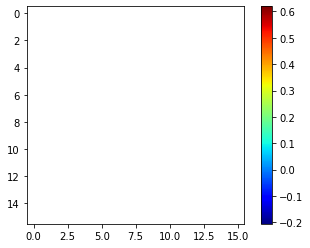

In [3]:
exercise3()

### Problem 4

For a Gaussian random variable $x$ with zero mean and standard
deviation $\sigma$, prove that
\begin{equation*}
    <xF(\alpha x)>=\alpha\sigma^2<F'(\alpha x)>,
\end{equation*}
where $\alpha$ is a constant, $F$ is any function, $F'$ is its derivative,
\begin{equation*}
    <xF(\alpha x)> = \int dx \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{x^2}{2\sigma^2}\right)}xF(\alpha x),
\end{equation*}
and similarly for $<F'(\alpha x)>$. This is the basis of the identity 2.64, which
can be derived by extending this basic result first to multivariate
functions and then to functionals.

*****
To prove this we simply use partial integration.
\begin{align*}
    <xF(\alpha x)> =& \int dx \frac{1}{\sqrt{2\pi\sigma^2}}\left[\exp{\left(-\frac{x^2}{2\sigma^2}\right)}x\right]F(\alpha x) 
    \\
    =& \int dx \frac{1}{\sqrt{2\pi\sigma^2}}\frac{d}{dx}\left[(-\sigma^2)\exp{\left(-\frac{x^2}{2\sigma^2}\right)}\right]F(\alpha x) 
    \\
    =&-\sigma^2 \left[\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{x^2}{2\sigma^2}\right)}F(\alpha x) \right]_{-\infty}^{\infty}
    +\sigma^2 \int dx \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{x^2}{2\sigma^2}\right)}\underbrace{\frac{d}{dx}F(\alpha x)}_{d/dx = \alpha d/(d\alpha x)}
    \\
    =& +\sigma^2 \int dx \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{x^2}{2\sigma^2}\right)}F'(\alpha x) \alpha
    \\
    =& \sigma^2 \alpha <F'(\alpha x)>
\end{align*}

Thus we proved the equation holds. Note, that we assumed that $F(x\rightarrow\pm\infty)$ can only grow slower than $\exp(x^2/(2\sigma^2))$. Therefore, it does not hold for any $F$.




### Problem 5
Using the inverses of equations 2.15 and 2.17
\begin{equation*}
    \epsilon = \epsilon_0(\exp(X/\lambda)-1) \quad\text{and}\quad a=-\frac{180^\circ (\epsilon_0+\epsilon)Y}{\lambda\epsilon\pi}
\end{equation*}
map from cortical coordinates back to visual coordinates and de-
termine what various patterns of activity across the primary visual
cortex would “look like”. Ermentrout and Cowan (Ermentrout, GB,
& Cowan, J (1979) A mathematical theory of visual hallucination pat-
terns. Biological Cybernetics 34:137–150) used these results as a basis of
a mathematical theory of visual hallucinations. The figure generated
by the MATLAB® program c2p5.m shows an illustrative example. This
program simulates a plane sine wave of activity across the primary
visual cortex with a specified spatial frequency and direction, and
then maps it back into retinal coordinates to see what visual pattern 
would be perceived due to this activity. Consider various other
patterns of activity and show the visual hallucinations they would
generate.

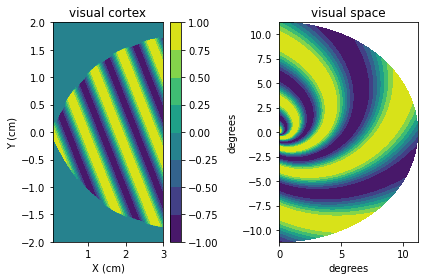

In [4]:
exercise5()

### Problem 6

Perform the integrals in equations 2.31 and 2.32 for the case $\sigma_x=\sigma_y=\sigma$ to obtain the results
$$L_s = \frac{A}{2}\exp\left(-\frac{\sigma^2(k^2+K^2)}{2}\right)(\cos(\phi-\Phi)\exp(\sigma^2kK\cos\Theta)+\cos(\phi+\Phi)\exp(-\sigma^2kK\cos\Theta))$$
and
$$L_t(t) = \frac{\alpha^6|\omega|\sqrt{\omega^2+4\alpha^2}}{(\omega^2+\alpha^2)^4}\cos(\omega t-\delta)$$
with
$$\delta = 8\arctan\frac\omega\alpha+\arctan\frac{2\alpha}{\omega}-\pi$$
From these results, verify the selectivity curves in figures 2.15 and
2.16. In addition, plot $\delta$ as a function of $\omega$.

*****
This is very nice exercise! We can solve it using complex calculus (the residue theorem) or using tricks I found at [math.SE] and [math.SE again]. Since this integral is pretty straightforward for anyone who had complex calculus using Cauchy's integral theorem I will do the trick answer - since it is nice and maybe profitable even for a person without the knowledge of complex calculus.

First let us compute integral
$$I[s,t] = \int_{-\infty}^\infty dx \exp(-x^2)\cos(sx+t).$$

The trick is that by taking a derivative with respect to $s$ and using partial integration we derive
$$\frac{dI[s,t]}{ds} = -\frac{s}{2}I[s,t].$$
That is just a differential equation with separable variables! Thus,
$$I[s, t] = C(t)\exp\left(-\frac{s^2}{4}\right).$$
The parametr $C(t)$ can be set by realizing
$$I[0,t] =\sqrt{\pi}\cos t.$$

Therefore, we derived
$$I[s,t] = \int_{-\infty}^\infty dx \exp(-x^2)\cos(sx+t) = \sqrt{\pi}\cos t \exp\left(-\frac{s^2}{4}\right)$$

Knowing this we can attack the first integral $L_s$. The strategy is first to integrate out variable $y$ by change of variables. The relevant part is
$$\int_{-\infty}^\infty \exp\left(-\frac{y^2}{2\sigma^2}\right)\cos(Kx\cos\Theta+Ky\sin\Theta-\Phi)$$

Let us denote 
$$t \equiv Kx\cos\Theta - \Phi$$
and change the variables so we have
$$\int_{-\infty}^\infty \exp\left(-\frac{y^2}{2\sigma^2}\right)\cos(Ky\sin\Theta+t) = \sqrt{2\sigma^2}\int_{-\infty}^\infty \exp(-x^2)\cos(Ky\sin\Theta\sqrt{2\sigma^2}+t)$$

We see now that 
$$\int_{-\infty}^\infty \exp\left(-\frac{y^2}{2\sigma^2}\right)\cos(Kx\cos\Theta+Ky\sin\Theta-\Phi) = \sqrt{2\sigma^2} I[K\sin\Theta\sqrt{2\sigma^2}, Kx\cos\Theta - \Phi]$$

We are left with the integral
$$\frac{A}{\sqrt{2\pi\sigma^2}}\exp(-\frac{K^2\sin^2\Theta\sigma^2}{2})\int dx \exp(-\frac{x^2}{2\sigma^2})\cos(kx-\phi)\cos(Kx\cos\Theta-\Phi)$$

Let us first play with the cosines
$$\cos a\cos b = \frac12(\cos(a+b) + \cos(a-b))$$

From here we have
$$\frac{A}{2\sqrt{2\pi\sigma^2}}\exp(-\frac{K^2\sin^2\Theta\sigma^2}{2})\int dx \exp(-\frac{x^2}{2\sigma^2})[\cos(x(k+K\cos\Theta)-\phi-\Phi)+ \cos(x(k-K\cos\Theta)-\phi+\Phi)]$$
$$=\frac{A}{2\sqrt{2\pi\sigma^2}}\exp(-\frac{K^2\sin^2\Theta\sigma^2}{2})\sqrt{2\sigma^2}[I[\sqrt{2\sigma^2}(k+K\cos\Theta), -\phi-\Phi]+I[\sqrt{2\sigma^2}(k-K\cos\Theta), -\phi+\Phi]]$$

And now it is easy to see

$$L_s = \frac{A}{2}\exp\left(-\frac{\sigma^2(k^2+K^2)}{2}\right)(\cos(\phi-\Phi)\exp(\sigma^2kK\cos\Theta)+\cos(\phi+\Phi)\exp(-\sigma^2kK\cos\Theta))$$

[math.SE again]: (https://math.stackexchange.com/questions/1297096/gaussian-integral-with-a-shift-in-the-complex-plane)

[math.SE]: (https://math.stackexchange.com/questions/1362987/evaluatig-int-0-inftyeax2-cosbxdx?noredirect=1&lq=1)

*****

Now we compute the other integral
$$L_t(t) = \int_0^\infty d\tau \cos(\omega(t-\tau))\alpha\exp(-\alpha\tau)\left(\frac{(\alpha\tau)^5}{5!}-\frac{(\alpha\tau)^7}{7!}\right)$$

For this we first define following integrals:
$$I_n[\lambda] = \int_0^\infty dx \cos(\lambda x)\exp(-x)\frac{x^n}{n!}$$
$$J_n[\lambda] = \int_0^\infty dx \sin(\lambda x)\exp(-x)\frac{x^n}{n!}$$

Integrating by part we can see a nice property for $n>0$
$$I_n$$

For this we first define following integrals:
$$I_n[\lambda] = \int_0^\infty dx \cos(\lambda x)\exp(-x)\frac{x^n}{n!}$$
$$J_n[\lambda] = \int_0^\infty dx \sin(\lambda x)\exp(-x)\frac{x^n}{n!}$$

Integrating by parts we can see a nice property for $n>0$
$$I_n[\lambda] =\frac1\lambda J_n[\lambda]-\frac1\lambda J_{n-1}[\lambda]$$
$$J_n[\lambda] =-\frac1\lambda I_n[\lambda]+\frac1\lambda I_{n-1}[\lambda]$$

so we can evaluate the integral by computing terms in a sequence, for this we 
need starting values 
$$I_0[\lambda]=\frac{1}{1+\lambda^2}$$
$$J_0[\lambda]=\frac\lambda{1+\lambda^2}$$

We can also derive formulae
$$I_n[\lambda] =\frac{2I_{n-1}[\lambda]-I_{n-2}[\lambda]}{1+\lambda^2}$$
$$J_n[\lambda] =\frac{2J_{n-1}[\lambda]-J_{n-2}[\lambda]}{1+\lambda^2}$$

with additional
$$I_1[\lambda] = \frac{1-\lambda^2}{(1+\lambda^2)^2}$$
$$J_1[\lambda] = \frac{2\lambda }{(1+\lambda^2)^2}$$

Let us note this gives us linear difference equations which can be solved by standard methods. We make ansaztz
$$I_n[\lambda]=J_n[\lambda]=\sum_i\alpha_i q_i^n$$
With $\alpha$ is a complex parameter given by starting conditions (i.e. different for $I_n$ and $J_n$, $q$ is same since the equations are the same).

$$q = \frac1{1+\lambda^2}+i\frac\lambda{1+\lambda^2}$$
$$\alpha = \frac{I_0}{2}+i\frac{I_0-(1+\lambda^2)I_1}{2\lambda}$$
For $I_n$:
$$\alpha = \frac{1}{2(1+\lambda^2)}+i\frac{\lambda}{2(1+\lambda^2)}$$
and for $J_n$:
$$\alpha = \frac{\lambda}{2(1+\lambda^2)}-i\frac{1}{2(1+\lambda^2)}$$

Since $q$ is complex, we can rewrite the solution as
$$I_n[\lambda]=2|\alpha||q|^n\cos\left(n\arctan\frac{\Re (q)}{\Im (q)}+\arctan\frac{\Re (\alpha)}{\Im (\alpha)}\right)$$

It is easy to compute
$$|q| = \frac{1}{\sqrt{1+\lambda^2}} = 2|\alpha|$$
$$\frac{\Re (q)}{\Im (q)}=\frac1\lambda$$
$$\frac{\Re (\alpha)}{\Im (\alpha)}=\frac1\lambda\qquad\text{for } I_n$$
$$\frac{\Re (\alpha)}{\Im (\alpha)}=-\lambda\qquad\text{for } J_n$$

$$I_n[\lambda]=\left(\frac1{1+\lambda^2}\right)^{\frac{n+1}{2}}\cos\left((n+1)\arctan\frac1\lambda\right) = \left(\frac1{1+\lambda^2}\right)^{\frac{n+1}{2}}\cos\left(\frac{\pi(n+1)}2-(n+1)\arctan\lambda\right)$$
$$J_n[\lambda]= \left(\frac1{1+\lambda^2}\right)^{\frac{n+1}{2}}\cos\left(\frac{\pi n}2-(n+1)\arctan\lambda\right)$$

With this notation we can rewrite $L_t(t)$ as
$$L_t(t)=\cos(\omega t)\left(J_5[\frac\omega\alpha]-J_7[\frac\omega\alpha]\right) + \sin(\omega t)\left(I_5[\frac\omega\alpha]-I_7[\frac\omega\alpha]\right)$$

$$\cos(\omega t)J_5[\frac\omega\alpha] + \sin(\omega t)I_5[\frac\omega\alpha]$$
$$=\left(\frac1{1+\lambda^2}\right)^{3}\left[\cos(\omega t)\cos\left(\frac{\pi}2-6\arctan\lambda\right)+\sin(\omega t)\cos\left(\pi-6\arctan\lambda\right)\right]$$
$$=\left(\frac1{1+\lambda^2}\right)^{3}\left[\cos(\omega t)\sin\left(6\arctan\lambda\right)-\sin(\omega t)\cos\left(6\arctan\lambda\right)\right]$$
$$=\left(\frac1{1+\lambda^2}\right)^{3}\sin(6\arctan\lambda-\omega t)$$

$$-\cos(\omega t)J_7[\frac\omega\alpha]-\sin(\omega t)I_7[\frac\omega\alpha]$$

$$=-\left(\frac1{1+\lambda^2}\right)^{4}\left[\cos(\omega t)\cos\left(-\frac{\pi}2-8\arctan\lambda\right)+\sin(\omega t)\cos\left(8\arctan\lambda\right)\right]$$
$$=\left(\frac1{1+\lambda^2}\right)^{4}\left[\cos(\omega t)\sin\left(8\arctan\lambda\right)-\sin(\omega t)\cos\left(8\arctan\lambda\right)\right]$$
$$=\left(\frac1{1+\lambda^2}\right)^{4}\sin(8\arctan\lambda-\omega t)$$

together

$$L_t(t)=\left(\frac1{1+(\frac\omega\alpha)^2}\right)^{3}\sin(6\arctan(\frac\omega\alpha)-\omega t)+\left(\frac1{1+(\frac\omega\alpha)^2}\right)^{4}\sin(8\arctan(\frac\omega\alpha)-\omega t)$$

This does not look like the wanted result...
